#  <center>Micro-Credit Defaulter Model <center>

In [18]:
# Importing Laibraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [19]:
# Loading Dataset
df = pd.read_excel(r'C:\Users\DELL\Desktop\internship projects\Micro_Credit_Loan.xlsx')
df.head()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


### Problem Statement: 
A Microfinance Institution (MFI) is an organization that offers financial services to low income populations. MFS becomes very useful when targeting especially the unbanked poor families living in remote areas with not much sources of income. The Microfinance services (MFS) provided by MFI are Group Loans, Agricultural Loans, Individual Business Loans and so on. 
Many microfinance institutions (MFI), experts and donors are supporting the idea of using mobile financial services (MFS) which they feel are more convenient and efficient, and cost saving, than the traditional high-touch model used since long for the purpose of delivering microfinance services. Though, the MFI industry is primarily focusing on low income families and are very useful in such areas, the implementation of MFS has been uneven with both significant challenges and successes.
Today, microfinance is widely accepted as a poverty-reduction tool, representing $70 billion in outstanding loans and a global outreach of 200 million clients.
We are working with one such client that is in Telecom Industry. They are a fixed wireless telecommunications network provider. They have launched various products and have developed its business and organization based on the budget operator model, offering better products at Lower Prices to all value conscious customers through a strategy of disruptive innovation that focuses on the subscriber. 
They understand the importance of communication and how it affects a person’s life, thus, focusing on providing their services and products to low income families and poor customers that can help them in the need of hour. 
They are collaborating with an MFI to provide micro-credit on mobile balances to be paid back in 5 days. The Consumer is believed to be defaulter if he deviates from the path of paying back the loaned amount within the time duration of 5 days. For the loan amount of 5 (in Indonesian Rupiah), payback amount should be 6 (in Indonesian Rupiah), while, for the loan amount of 10 (in Indonesian Rupiah), the payback amount should be 12 (in Indonesian Rupiah). 
The sample data is provided to us from our client database. It is hereby given to you for this exercise. In order to improve the selection of customers for the credit, the client wants some predictions that could help them in further investment and improvement in selection of customers. 


In [20]:
df_description = pd.read_excel(r'C:\Users\DELL\Desktop\internship projects\micro credit loan data desc.xlsx')
df_description

,Variable,Definition,Comment
0,label,Flag indicating whether the user paid back the...,NaN
1,msisdn,mobile number of user,NaN
2,aon,age on cellular network in days,NaN
3,daily_decr30,"Daily amount spent from main account, averaged...",NaN
4,daily_decr90,"Daily amount spent from main account, averaged...",NaN
5,rental30,Average main account balance over last 30 days,Unsure of given definition
6,rental90,Average main account balance over last 90 days,Unsure of given definition
7,last_rech_date_ma,Number of days till last recharge of main account,NaN
8,last_rech_date_da,Number of days till last recharge of data account,NaN
9,last_rech_amt_ma,Amount of last recharge of main account (in In...,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   Unnamed: 0            209593 non-null  int64         
 1   label                 209593 non-null  int64         
 2   msisdn                209593 non-null  object        
 3   aon                   209593 non-null  float64       
 4   daily_decr30          209593 non-null  float64       
 5   daily_decr90          209593 non-null  float64       
 6   rental30              209593 non-null  float64       
 7   rental90              209593 non-null  float64       
 8   last_rech_date_ma     209593 non-null  float64       
 9   last_rech_date_da     209593 non-null  float64       
 10  last_rech_amt_ma      209593 non-null  int64         
 11  cnt_ma_rech30         209593 non-null  int64         
 12  fr_ma_rech30          209593 non-null  float64       
 13 

we can observe that there is three object type attributes are there .They are msisdn,pcircle,pdate

In [21]:
# checking null values 
df.isnull().sum()

Unnamed: 0              0
label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

 there is no null or missing values in this data set

In [22]:
df.shape

(209593, 37)

## 1. Remove columns where number of unique value is only 1.
We will remove all columns where number of unique value is only 1 because that will not make any sense in the analysis

In [23]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [24]:
unique = df.nunique()
unique = unique[unique.values == 1]

In [25]:
df.drop(labels = list(unique.index), axis =1, inplace=True)

In [26]:
df.shape

(209593, 35)

In [27]:
df.describe()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,...,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000
mean,0.875177,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.847800,3712.202921,2064.452797,3.978057,...,2.758981,17.952021,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485
std,0.330519,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.892230,53374.833430,2370.786034,4.256090,...,2.554502,17.379741,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108
min,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,-29.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,246.000000,42.440000,42.692000,280.420000,300.260000,1.000000,0.000000,770.000000,1.000000,...,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000
50%,1.000000,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.000000,0.000000,1539.000000,3.000000,...,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667
75%,1.000000,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.000000,0.000000,2309.000000,5.000000,...,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000
max,1.000000,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,999171.809410,55000.000000,203.000000,...,50.000000,306.000000,99864.560864,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000


In [28]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
label,209593.0,0.875177,0.330519,0.000000,1.000,1.000000,1.00,1.000000
aon,209593.0,8112.343445,75696.082531,-48.000000,246.000,527.000000,982.00,999860.755168
daily_decr30,209593.0,5381.402289,9220.623400,-93.012667,42.440,1469.175667,7244.00,265926.000000
daily_decr90,209593.0,6082.515068,10918.812767,-93.012667,42.692,1500.000000,7802.79,320630.000000
rental30,209593.0,2692.581910,4308.586781,-23737.140000,280.420,1083.570000,3356.94,198926.110000
rental90,209593.0,3483.406534,5770.461279,-24720.580000,300.260,1334.000000,4201.79,200148.110000
last_rech_date_ma,209593.0,3755.847800,53905.892230,-29.000000,1.000,3.000000,7.00,998650.377733
last_rech_date_da,209593.0,3712.202921,53374.833430,-29.000000,0.000,0.000000,0.00,999171.809410
last_rech_amt_ma,209593.0,2064.452797,2370.786034,0.000000,770.000,1539.000000,2309.00,55000.000000
cnt_ma_rech30,209593.0,3.978057,4.256090,0.000000,1.000,3.000000,5.00,203.000000


In [29]:
#Here we check the summary of object and datetime columns
df.describe(include=['object','datetime']).transpose()

,count,unique,top,freq,first,last
msisdn,209593,186243,04581I85330,7,NaT,NaT
pdate,209593,82,2016-07-04 00:00:00,3150,2016-06-01,2016-08-21


<b>Observation:</b>

* Summary statistics shows all the statistics of our dataset i.e. mean, median and other calculation.
* Mean is greater than median in all the columns so aur data is right skewed.
* The difference between 75% and maximum is higher that's why outliers are removed which needs to be removed.
* The pdate column tells the date when the data is collect. It contains only three month data.
* msidn is a mobile number of user and mobile number is unique for every customers. There are only 186243 unique number out of 209593 so rest of the data is duplicates entry so we have to remove those entry.

In [30]:
df1=df.copy()

In [31]:
#Deleting the duplicates entry in msidn column
df = df.drop_duplicates(subset = 'msisdn')
df.shape

(186243, 35)

## Data Exploration

In [32]:
#Printing the object datatypes and their unique values.
for column in df.columns:
    if df[column].dtypes == object:
        print(str(column) + ' : ' + str(df[column].unique()))

msisdn : ['21408I70789' '76462I70374' '17943I70372' ... '22758I85348' '59712I82733'
 '65061I85339']


In [33]:
#Printing the float datatype columns and number of unique values in the particular columns.

for column in df.columns:
    if df[column].dtype==np.number:
        print(str(column) + ' : ' + str(df[column].nunique()))
        print(df[column].nunique())
        print('**********************')

aon : 4282
4282
**********************
daily_decr30 : 130324
130324
**********************
daily_decr90 : 139843
139843
**********************
rental30 : 117881
117881
**********************
rental90 : 125595
125595
**********************
last_rech_date_ma : 1061
1061
**********************
last_rech_date_da : 1061
1061
**********************
fr_ma_rech30 : 961
961
**********************
medianamnt_ma_rech30 : 501
501
**********************
medianmarechprebal30 : 28486
28486
**********************
medianamnt_ma_rech90 : 602
602
**********************
medianmarechprebal90 : 28064
28064
**********************
cnt_da_rech30 : 949
949
**********************
fr_da_rech30 : 960
960
**********************
maxamnt_loans30 : 924
924
**********************
medianamnt_loans30 : 6
6
**********************
cnt_loans90 : 968
968
**********************
medianamnt_loans90 : 6
6
**********************
payback30 : 1249
1249
**********************
payback90 : 2128
2128
**********************


In [34]:
#Checking the number of defaulter and non defaulter customers.
df['label'].value_counts()

1    160383
0     25860
Name: label, dtype: int64

<b>Observation:
</b>
* After seeing the label column which is also our target feature for this dataset it is clearly shown that 86.11% of
* data is label 1 and only 13.8% of data is label 0 so our dataset is implanced. So before making the ML model first we have to do sampling to get rid off imblance dataset.

In [35]:
#checking correlation
df_cor = df.corr()
df_cor

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
label,1.000000,-0.004035,0.174901,0.173016,0.057207,0.075869,0.004113,0.001814,0.139969,0.244728,...,0.197565,0.199916,-0.000274,0.050067,0.004305,0.205065,0.086033,0.041265,0.050892,0.053776
aon,-0.004035,1.000000,0.000630,0.000052,-0.002930,-0.002618,0.001853,-0.001796,0.004102,-0.004315,...,-0.003157,-0.003302,-0.003096,0.004679,0.000192,-0.003336,-0.000975,0.002346,0.002246,0.002549
daily_decr30,0.174901,0.000630,1.000000,0.977659,0.427503,0.444932,-0.000171,-0.001311,0.287181,0.444365,...,0.346504,0.454169,0.001569,-0.005629,0.008865,0.542179,0.396803,-0.031485,0.033669,0.056822
daily_decr90,0.173016,0.000052,0.977659,1.000000,0.420561,0.457443,0.000058,-0.001484,0.275195,0.419650,...,0.321006,0.430940,0.001283,0.000012,0.009220,0.544854,0.394487,-0.029046,0.025432,0.050147
rental30,0.057207,-0.002930,0.427503,0.420561,1.000000,0.955233,-0.000949,0.003294,0.128773,0.220472,...,0.162833,0.217586,-0.001525,-0.013746,0.003026,0.280233,0.225449,-0.032555,0.075530,0.099533
rental90,0.075869,-0.002618,0.444932,0.457443,0.955233,1.000000,-0.001758,0.002643,0.123436,0.218618,...,0.154900,0.216641,-0.002189,-0.006703,0.004301,0.307920,0.241772,-0.031045,0.069847,0.104731
last_rech_date_ma,0.004113,0.001853,-0.000171,0.000058,-0.000949,-0.001758,1.000000,0.002629,-0.000754,0.006491,...,0.002308,0.001031,0.001681,0.002430,-0.000216,0.000664,-0.003097,0.003261,-0.002857,-0.001787
last_rech_date_da,0.001814,-0.001796,-0.001311,-0.001484,0.003294,0.002643,0.002629,1.000000,-0.000699,0.002690,...,0.001722,0.001443,0.001135,0.000009,-0.002355,0.001179,0.002294,-0.002258,-0.000020,0.000699
last_rech_amt_ma,0.139969,0.004102,0.287181,0.275195,0.128773,0.123436,-0.000754,-0.000699,1.000000,0.008012,...,-0.019892,0.017706,0.000558,0.029945,0.000444,0.024067,0.148656,0.022939,-0.026037,-0.013236
cnt_ma_rech30,0.244728,-0.004315,0.444365,0.419650,0.220472,0.218618,0.006491,0.002690,0.008012,1.000000,...,0.733577,0.723759,-0.001186,-0.058580,0.012307,0.658939,0.180305,-0.063378,0.057166,0.031696


<b>Observation:
</b>
* daily_decr30 and daily_decr90 features are highly correlated with each otheer.
* rental30 and rental90 features are highly correlated with each other.
* cnt_loans30 and amount_loans30 columns are highly correlated with each other.
* amount_loans30 is also highly correlated with amount_loans90 column.
* medianamnt_loans30 and medianamnt_loans90 is highly correlated with each other.
* We have to drop one of the features which are highly correlated with other feayures. And if we dont do this then our model will face multicolinearity problem.

In [36]:
#Dropping the columns which is highly correlated with each other do avoid multicolinearity problem.
df.drop(columns=['daily_decr30','rental30','amnt_loans30','medianamnt_loans30'],axis=1, inplace = True)

In [37]:
#Now checking the shape
print(df.shape)
#Checking the unique value in pdate column.
df['pdate'].nunique()


(186243, 31)


82

In [38]:
#Making the new column Day, Month and year from pdate column
df['pDay']=pd.to_datetime(df['pdate'],format='%Y/%m/%d').dt.day
df['pMonth']=pd.to_datetime(df['pdate'],format='%Y/%m/%d').dt.month
df['pYear']=pd.to_datetime(df['pdate'],format='%Y/%m/%d').dt.year

In [39]:
df.head()

,label,msisdn,aon,daily_decr90,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,...,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pdate,pDay,pMonth,pYear
0,0,21408I70789,272.0,3065.150000,260.13,2.0,0.0,1539,2,21.0,...,2.0,12,6,0.0,29.000000,29.000000,2016-07-20,20,7,2016
1,1,76462I70374,712.0,12124.750000,3691.26,20.0,0.0,5787,1,0.0,...,1.0,12,12,0.0,0.000000,0.000000,2016-08-10,10,8,2016
2,1,17943I70372,535.0,1398.000000,900.13,3.0,0.0,1539,1,0.0,...,1.0,6,6,0.0,0.000000,0.000000,2016-08-19,19,8,2016
3,1,55773I70781,241.0,21.228000,159.42,41.0,0.0,947,0,0.0,...,2.0,12,6,0.0,0.000000,0.000000,2016-06-06,6,6,2016
4,1,03813I82730,947.0,150.619333,1098.90,4.0,0.0,2309,7,2.0,...,7.0,42,6,0.0,2.333333,2.333333,2016-06-22,22,6,2016


In [40]:
#Checking the number of months 
df['pMonth'].unique()

array([7, 8, 6], dtype=int64)

In [41]:
#After fetching the data from pdate column now we are going to drop it because it has not any significant role.
df.drop(columns=['pdate'],axis=1, inplace = True)

In [42]:
#Seprate the categorical columns and Numerical columns
cat_df,num_df=[],[]

for i in df.columns:
    if df[i].dtype==object:
        cat_df.append(i)
    elif (df[i].dtypes=='int64') | (df[i].dtypes=='float64') | (df[i].dtypes=='int32'):
        num_df.append(i)
    else: continue
        
print('>>> Total Number of Feature::', df.shape[1])
print('>>> Number of categorical features::', len(cat_df))
print('>>> Number of Numerical Feature::', len(num_df))

>>> Total Number of Feature:: 33
>>> Number of categorical features:: 1
>>> Number of Numerical Feature:: 32


## Data Visualization

Text(0.5, 1.0, 'Correlation with target Variable that is label column')

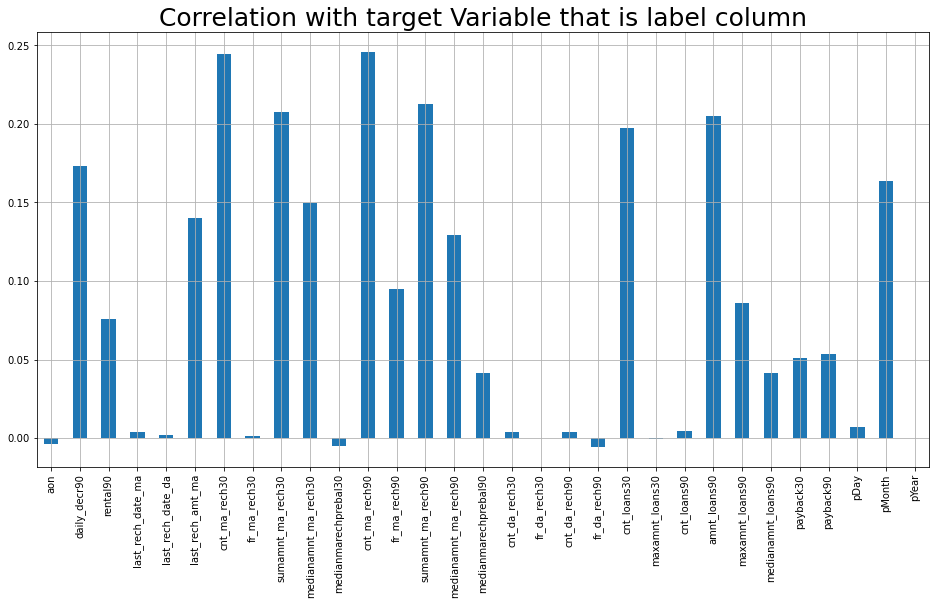

In [43]:
#Checking the correlation with target variable
plt.figure(figsize=(16,8))
df.drop('label', axis=1).corrwith(df['label']).plot(kind='bar',grid=True)
plt.xticks(rotation='vertical')
plt.title("Correlation with target Variable that is label column",fontsize=25)

#### Observation:

Here we see the correlation of the columns with respect to the target column that is label.


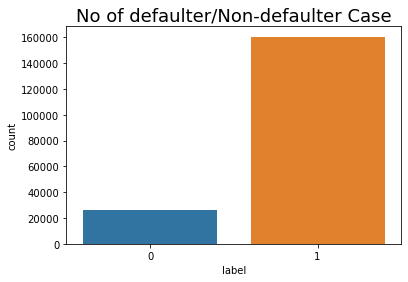

1    160383
0     25860
Name: label, dtype: int64


In [44]:
#Checking the number of Fraud cases.
sns.countplot(x='label', data=df)
plt.title('No of defaulter/Non-defaulter Case',fontsize=18)
plt.show()

print(df['label'].value_counts())

#### Observation:

Label 1 indicates loan has been payed i.e Non-Defaulter and label 0 indicates indicates that the loan has not beenpayed i.e. defaulter.

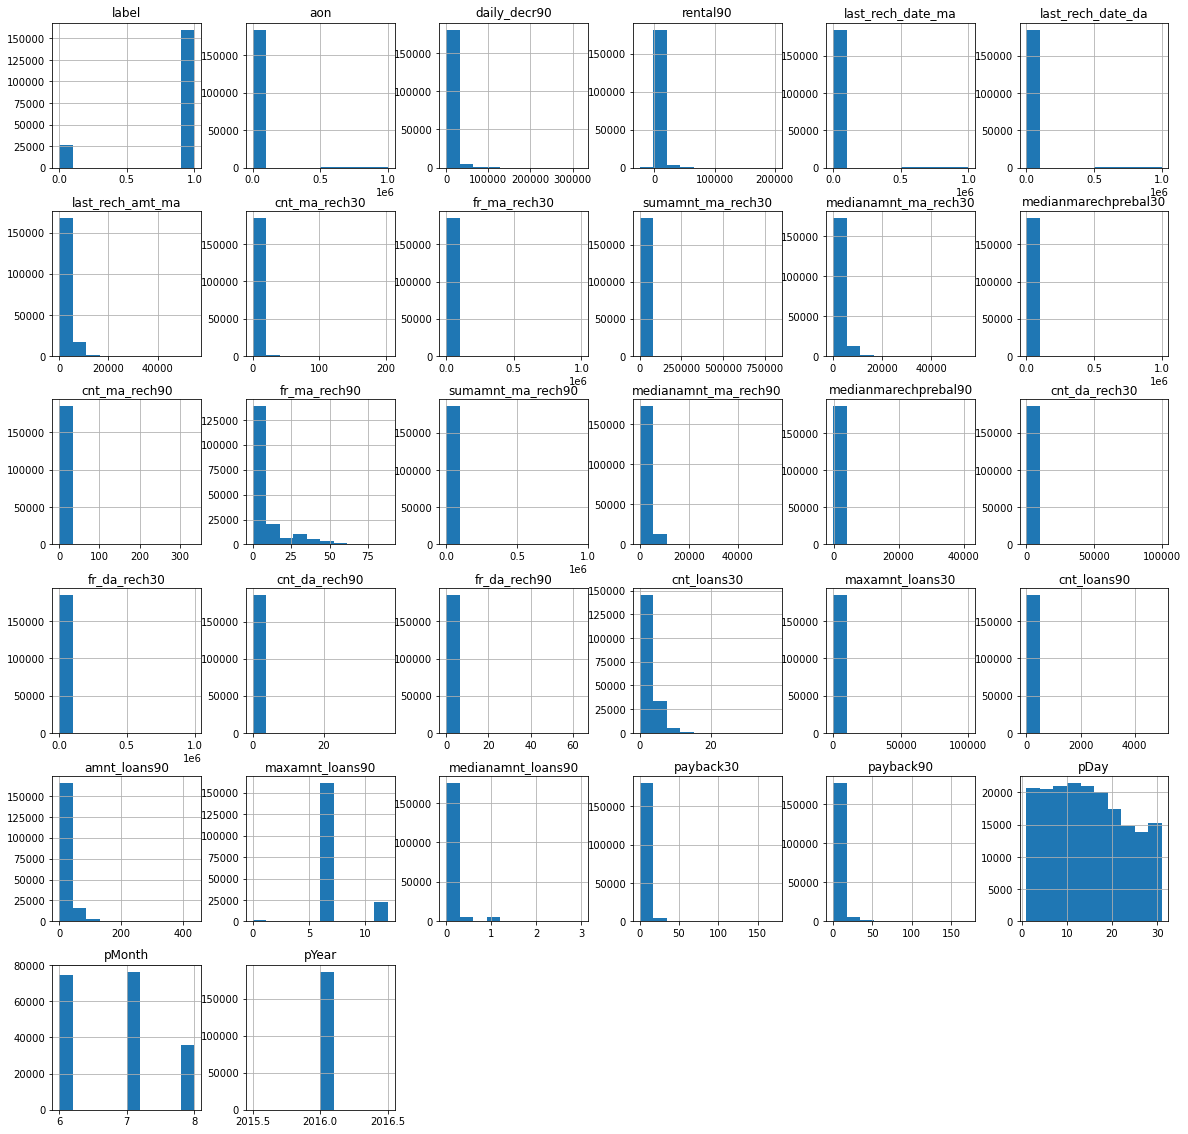

In [45]:
#Plotting the Histogram
df.hist(figsize=(20,20))
plt.show()

#### Observation:

We plot the histogram to display the shape and spread of continuous sample data.In a histogram, each bar groups numbers into ranges. Taller bars show that more data falls in that range

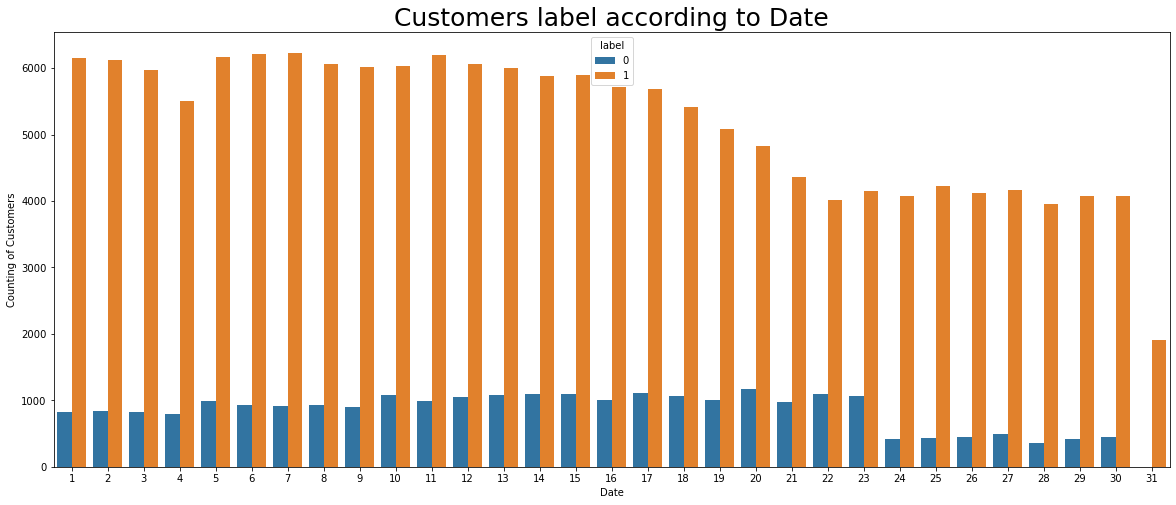

In [46]:
#Customer label according to Date
plt.figure(figsize=(20,8))
sns.countplot(x="pDay", hue='label', data=df)
plt.title("Customers label according to Date", fontsize=25)
plt.xlabel('Date')
plt.ylabel('Counting of Customers')
plt.show()

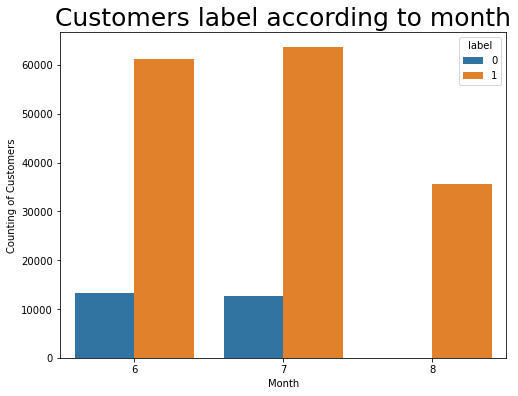

In [47]:
#Customer label according to Month
plt.figure(figsize=(8,6))
sns.countplot(x="pMonth", hue='label', data=df)
plt.title("Customers label according to month", fontsize=25)
plt.xlabel('Month')
plt.ylabel('Counting of Customers')
plt.show()

#### Observation:

* The first figure which is date vs label shows that the customers who did not pay their loans are from date 10 to 23.
* There are severals customers at June and July month who did not pay their loan. 

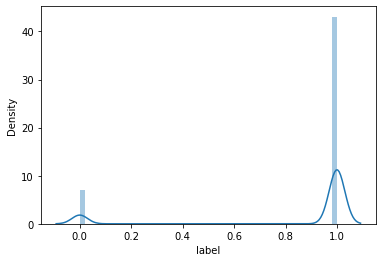

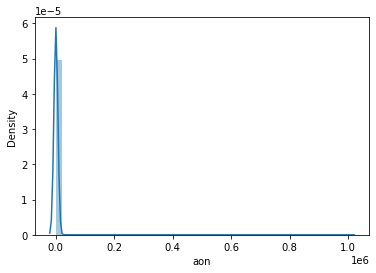

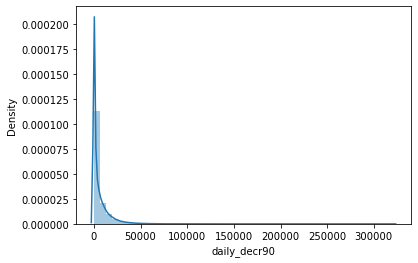

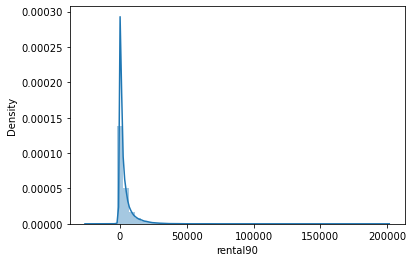

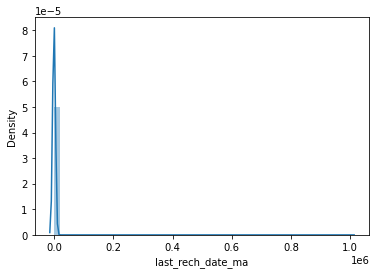

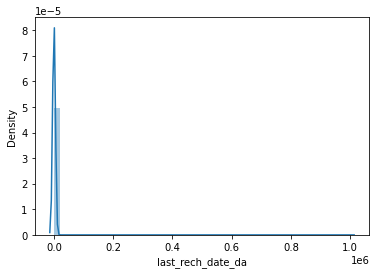

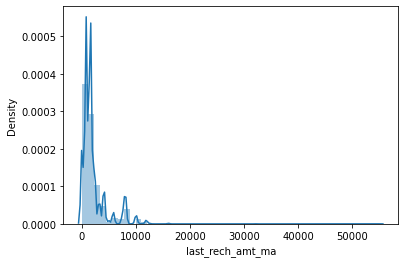

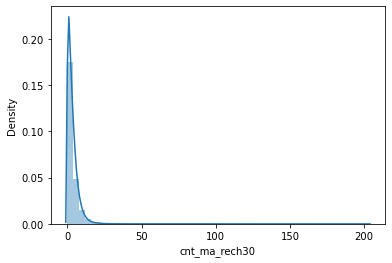

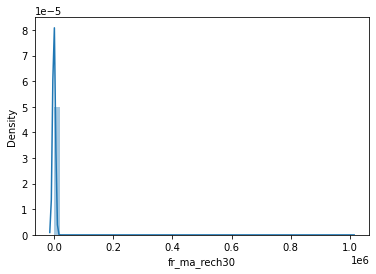

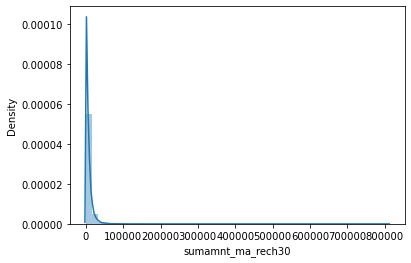

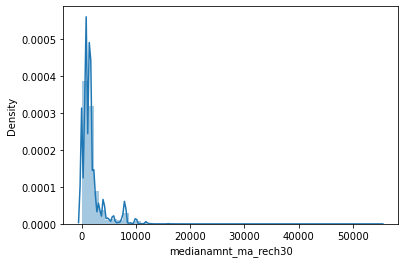

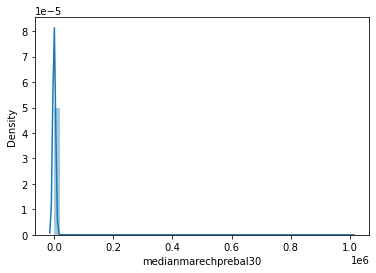

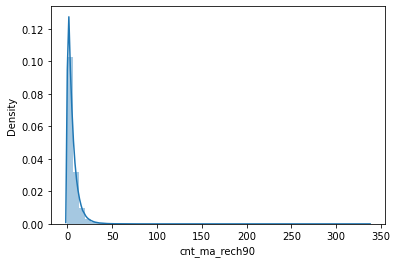

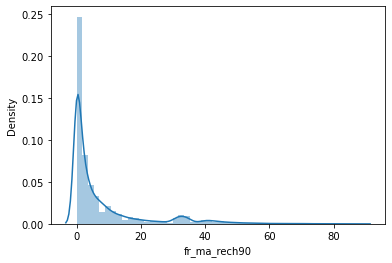

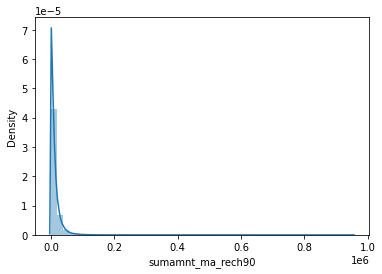

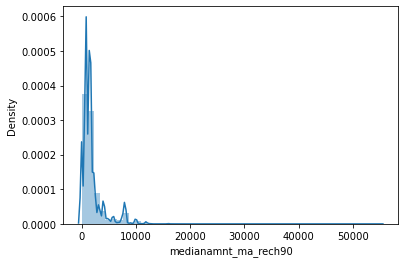

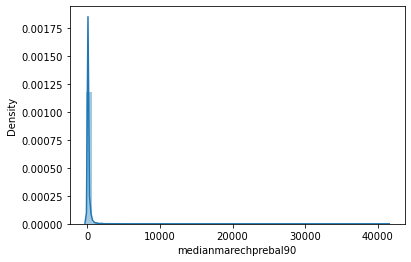

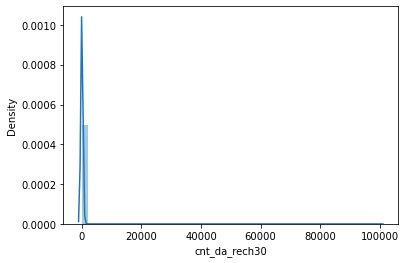

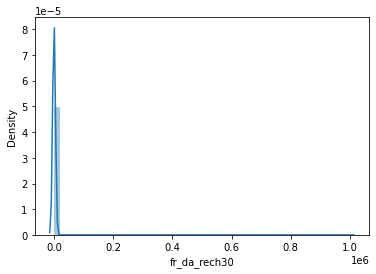

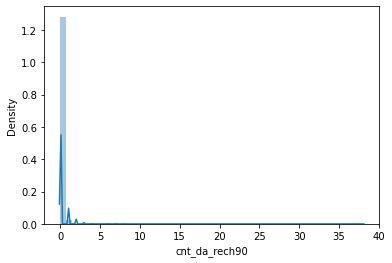

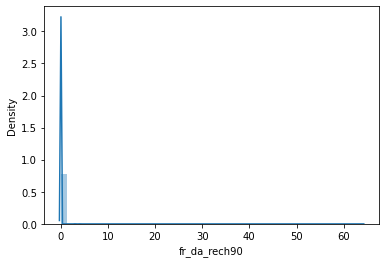

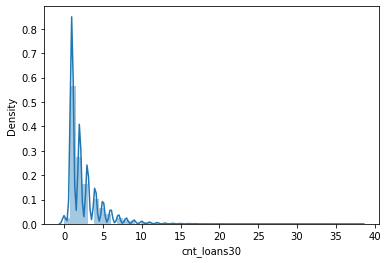

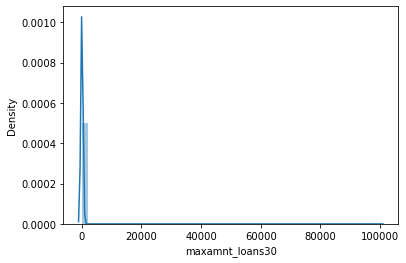

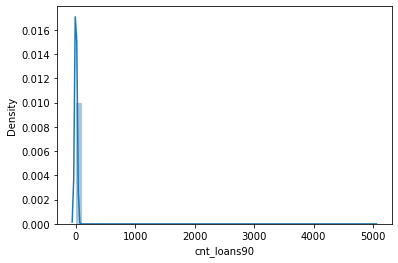

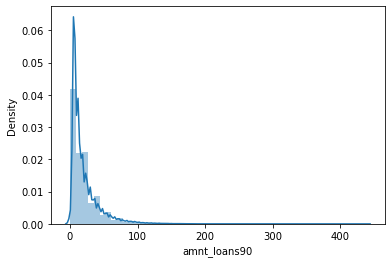

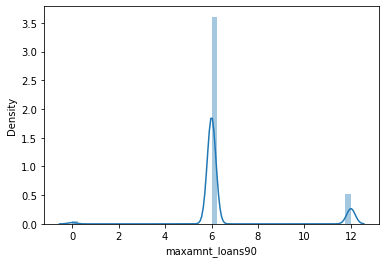

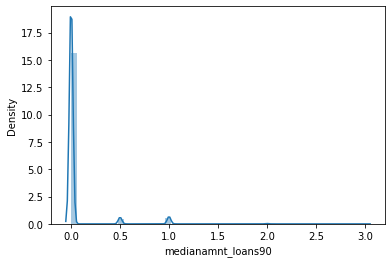

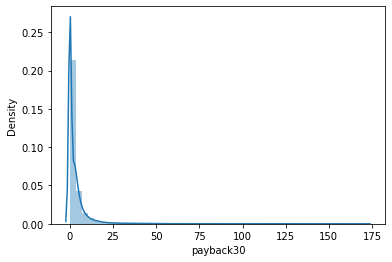

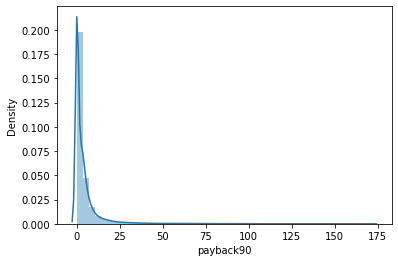

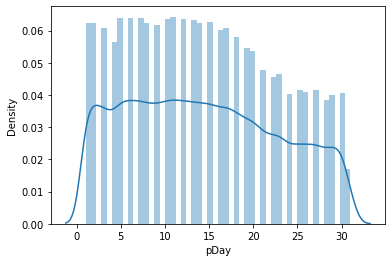

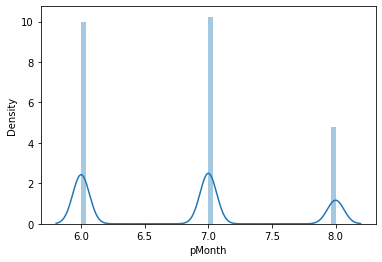

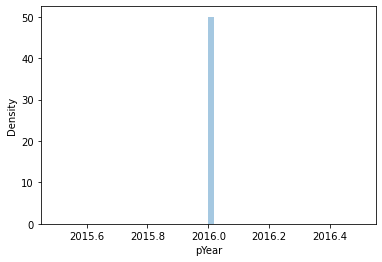

In [48]:
#checking skewness

for col in df.describe().columns:
    sns.distplot(df[col])
    plt.show()

In [49]:
df.skew()

label                   -2.088847
aon                     10.365026
daily_decr90             4.301490
rental90                 4.530925
last_rech_date_ma       14.852116
last_rech_date_da       14.781824
last_rech_amt_ma         3.830612
cnt_ma_rech30            3.471313
fr_ma_rech30            14.822224
sumamnt_ma_rech30        7.134012
medianamnt_ma_rech30     3.519213
medianmarechprebal30    14.677544
cnt_ma_rech90            3.558616
fr_ma_rech90             2.250443
sumamnt_ma_rech90        5.231693
medianamnt_ma_rech90     3.753115
medianmarechprebal90    43.576364
cnt_da_rech30           17.749485
fr_da_rech30            14.728609
cnt_da_rech90           28.396293
fr_da_rech90            28.959851
cnt_loans30              2.737584
maxamnt_loans30         17.718074
cnt_loans90             16.717192
amnt_loans90             3.165962
maxamnt_loans90          1.650198
medianamnt_loans90       4.774958
payback30                8.193009
payback90                6.763241
pDay          

<AxesSubplot:xlabel='label', ylabel='fr_da_rech30'>

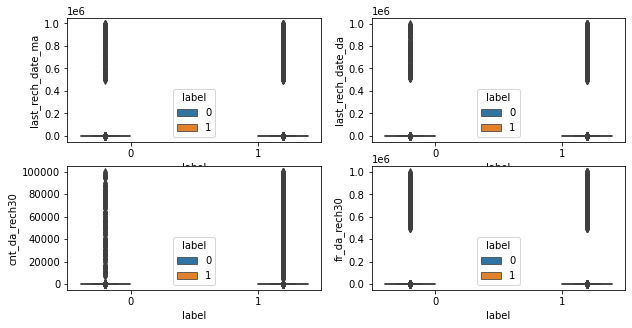

In [77]:
#Checking outliers

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize = (10, 5))
sns.boxplot(ax=ax1, x = 'label', y = 'last_rech_date_ma', hue = 'label', data = df)
sns.boxplot(ax=ax2, x = 'label', y = 'last_rech_date_da', hue = 'label', data = df)
sns.boxplot(ax=ax3, x = 'label', y = 'cnt_da_rech30', hue = 'label', data = df)
sns.boxplot(ax=ax4, x = 'label', y = 'fr_da_rech30', hue = 'label', data = df)

#### Observation:

There are too many outliers present in our dataset.So we need to remove it. But before removing we have to check percentage of data loss should not be more than 7-8 %

In [51]:
#Creating a copy of our dataset
df2=df1.copy()
#Dropping the object columns
df1.drop(columns=['msisdn','pdate'],axis=1,inplace=True)

In [52]:
df1.columns

Index(['label', 'aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90',
       'last_rech_date_ma', 'last_rech_date_da', 'last_rech_amt_ma',
       'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30',
       'medianamnt_ma_rech30', 'medianmarechprebal30', 'cnt_ma_rech90',
       'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90',
       'medianmarechprebal90', 'cnt_da_rech30', 'fr_da_rech30',
       'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30', 'amnt_loans30',
       'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90', 'amnt_loans90',
       'maxamnt_loans90', 'medianamnt_loans90', 'payback30', 'payback90'],
      dtype='object')

In [53]:
from scipy.stats import zscore
z=np.abs(zscore(df1))
z

array([[2.64789583, 0.10357685, 0.25229941, ..., 0.22959366, 2.9046997 ,
        2.39409346],
       [0.37765836, 0.09776412, 0.73103667, ..., 0.22959366, 0.38562959,
        0.41923266],
       [0.37765836, 0.10010243, 0.43201111, ..., 0.22959366, 0.38562959,
        0.41923266],
       ...,
       [0.37765836, 0.09378769, 0.70079045, ..., 0.22959366, 0.06820893,
        0.04735622],
       [0.37765836, 0.08428915, 0.77075515, ..., 0.22959366, 0.38562959,
        0.59938541],
       [0.37765836, 0.08628398, 0.09674426, ..., 0.22959366, 0.38562959,
        0.41923266]])

In [54]:
threshold=3
print(np.where(z>3))

(array([    21,     22,     22, ..., 209586, 209587, 209587], dtype=int64), array([15, 15, 32, ..., 28, 26, 30], dtype=int64))


In [55]:

df1_new=df1[(z<3).all(axis=1)]

In [56]:
print(df1.shape)

(209593, 33)


In [57]:
print(df1_new.shape)

(161465, 33)


In [58]:
#Percentage loss of data:
Data_loss=((209593 - 161465)/209593)*100

Data_loss

22.962598941758554

####  Observation:
Data loss is above 7 percent so, we will not remove the outliers

In [59]:
#Converting the categorical data into numeric variables

from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

for column in df.columns:
    if df[column].dtype==np.number:
        continue
    df[column]=le.fit_transform(df[column])

In [60]:
df.head()

,label,msisdn,aon,daily_decr90,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,...,maxamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pDay,pMonth,pYear
0,0,40191,272.0,3065.150000,260.13,2.0,0.0,14,2,21.0,...,6.0,2.0,2,1,0.0,29.000000,29.000000,19,1,0
1,1,142291,712.0,12124.750000,3691.26,20.0,0.0,38,1,0.0,...,12.0,1.0,2,2,0.0,0.000000,0.000000,9,2,0
2,1,33594,535.0,1398.000000,900.13,3.0,0.0,14,1,0.0,...,6.0,1.0,1,1,0.0,0.000000,0.000000,18,2,0
3,1,104157,241.0,21.228000,159.42,41.0,0.0,10,0,0.0,...,6.0,2.0,2,1,0.0,0.000000,0.000000,5,0,0
4,1,6910,947.0,150.619333,1098.90,4.0,0.0,23,7,2.0,...,6.0,7.0,7,1,0.0,2.333333,2.333333,21,0,0


In [61]:
#Splitting the data into x and y
x = df.drop(['label'], axis=1)

y = df['label']

## Model Building

In [62]:
#Scaling in input variables
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x=ss.fit_transform(x)    

In [63]:
#Splitting the data into training and testing data

from sklearn.model_selection import train_test_split,cross_val_score
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42,stratify=y)

In [64]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

In [65]:
KNN=KNeighborsClassifier(n_neighbors=10)
LR=LogisticRegression()
DT=DecisionTreeClassifier(random_state=20)
GNB=GaussianNB()
RF=RandomForestClassifier()

In [66]:
models = []
models.append(('KNeighborsClassifier', KNN))
models.append(('LogisticRegression', LR))
models.append(('DecisionTreeClassifier',DT))
models.append(('GaussianNB', GNB))
models.append(('RandomForestClassifier', RF))

In [67]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc

----- KNeighborsClassifier -----


KNeighborsClassifier(n_neighbors=10)


Accuracy score =  0.8699830867942764


Cross_val_Score =  0.8712971390022833


roc_auc_score =  0.6866818721270581


classification_report
               precision    recall  f1-score   support

           0       0.54      0.43      0.48      5172
           1       0.91      0.94      0.93     32077

    accuracy                           0.87     37249
   macro avg       0.73      0.69      0.70     37249
weighted avg       0.86      0.87      0.86     37249



[[ 2239  2933]
 [ 1910 30167]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)



----- LogisticRegression -----


LogisticRegression()


Accuracy score =  0.8646406614942683


Cross_val_Score =  0.8645371811503955


roc_auc_score =  0.5275687500646464


classification_report
               precision    recall  f1-score   support

           0       0.63      0.06      0.11      5172
           1       0.87      0.99      0.93     32077

    accuracy      

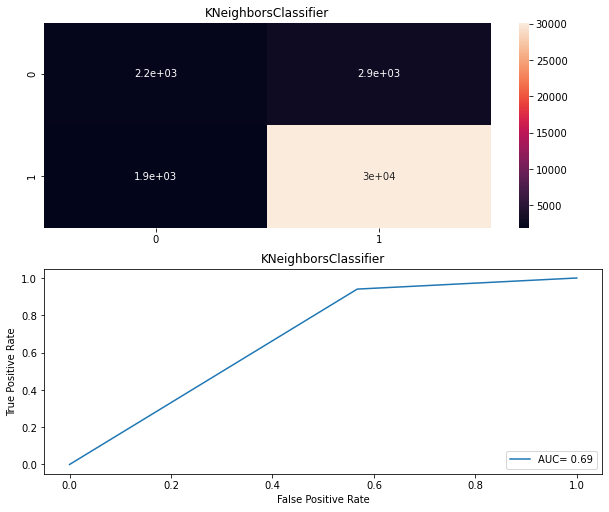

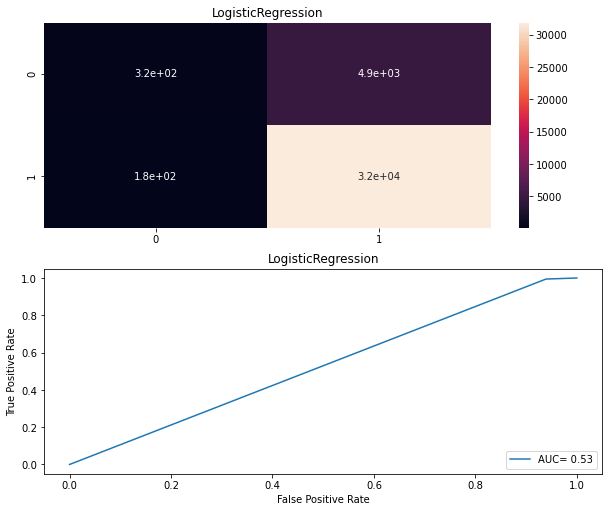

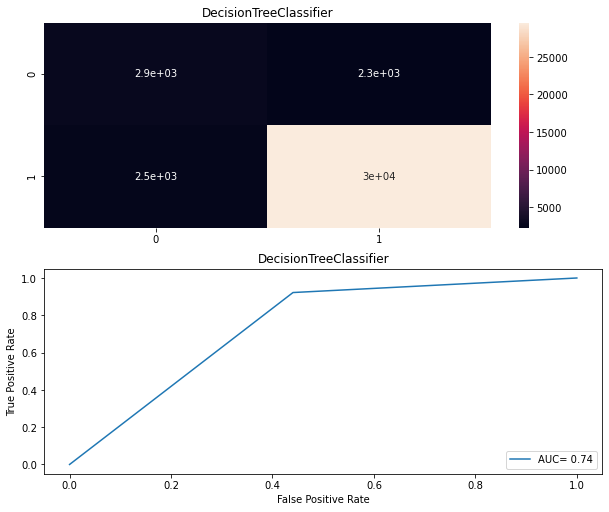

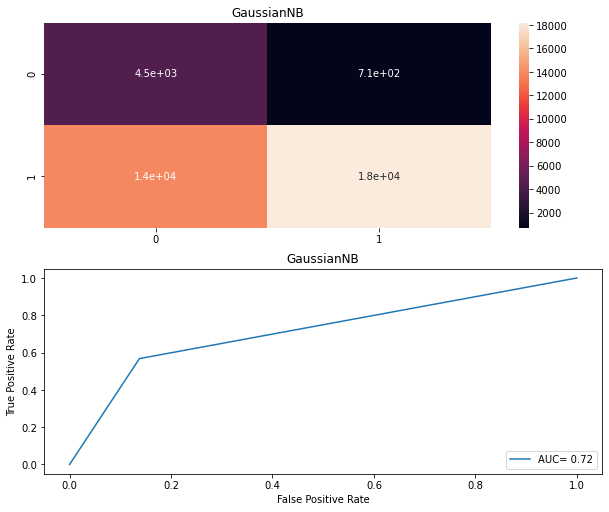

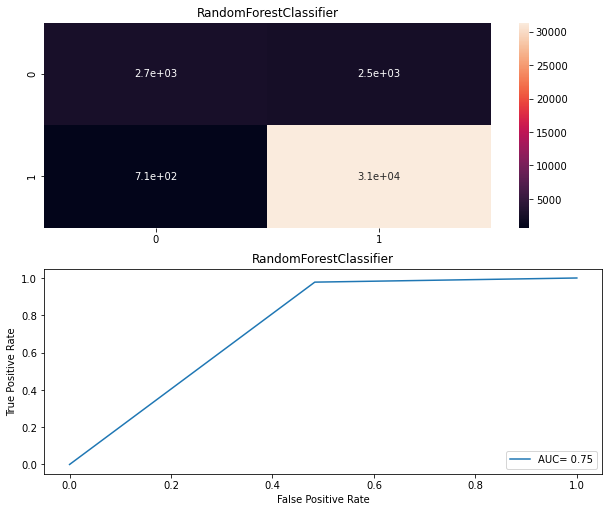

In [68]:
Model=[]
score=[]
cvs=[]
rocscore=[]
for name,model in models:
    print('-----',name,'-----')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train.values.ravel())
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print('Accuracy score = ', AS)
    score.append(AS*100)
    print('\n')
    sc=cross_val_score(model,x,y,cv=10,scoring='accuracy').mean()
    print('Cross_val_Score = ', sc)
    cvs.append(sc*100)
    print('\n')
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,pre)
    roc_auc= auc(false_positive_rate, true_positive_rate)
    print('roc_auc_score = ',roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print('classification_report\n',classification_report(y_test,pre))
    print('\n')
    cm=confusion_matrix(y_test,pre)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(name)
    plt.plot(false_positive_rate, true_positive_rate, label = 'AUC= %0.2f'%roc_auc)
    plt.legend(loc='lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    print('\n\n')

In [70]:
conclusion=pd.DataFrame({'Model': Model, 'Accuracy_score': score, 'Cross_val_score':cvs, 'Roc_auc_curve':rocscore})
conclusion

,Model,Accuracy_score,Cross_val_score,Roc_auc_curve
0,KNeighborsClassifier,86.998309,87.129714,68.668187
1,LogisticRegression,86.464066,86.453718,52.756875
2,DecisionTreeClassifier,87.167441,87.466371,74.077581
3,GaussianNB,60.860694,60.366816,71.501607
4,RandomForestClassifier,91.374265,91.322089,74.720012
